In [1]:
import pandas as pd

In [2]:
spam=pd.read_csv("spam.csv",encoding='latin1')

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

In [5]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
spam=spam[['v1','v2']] 

In [7]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
spam=spam.rename(columns={'v1':'target','v2':'text'})

In [9]:
spam.sample(6)

,target,text
2582,spam,3 FREE TAROT TEXTS! Find out about your love l...
1441,ham,Ya:)going for restaurant..
5210,ham,Dai i downloaded but there is only exe file wh...
964,ham,Are you this much buzy
116,spam,You are a winner U have been specially selecte...
2395,ham,"Babe, I'm back ... Come back to me ..."


In [10]:
 from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
spam['target']=lb.fit_transform(spam['target'])

In [11]:
spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
spam.duplicated().sum()

403

In [13]:
spam=spam.drop_duplicates(keep='first')

In [14]:
spam.shape

(5169, 2)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
spam['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

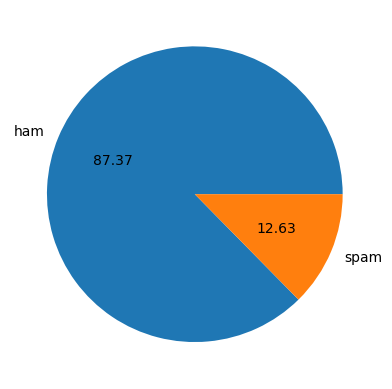

In [17]:
plt.pie(spam['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
spam['number_of_characters']=spam['text'].apply(len)

In [38]:
import nltk

In [39]:
spam.head()

,target,text,number_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
spam['number_of_words']=spam['text'].apply(lambda x:nltk.word_tokenize(x)).apply(len)

In [43]:
spam.head()

,target,text,number_of_characters,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
spam['number_of_sentences']=spam['text'].apply(lambda x:nltk.sent_tokenize(x)).apply(len)

In [48]:
spam.head()

,target,text,number_of_characters,number_of_words,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
spam[['number_of_characters','number_of_words','number_of_sentences']].describe()

,number_of_characters,number_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
spam[spam ['target']==0][['number_of_characters','number_of_words','number_of_sentences']].describe()

,number_of_characters,number_of_words,number_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
spam[spam ['target']==1][['number_of_characters','number_of_words','number_of_sentences']].describe()

,number_of_characters,number_of_words,number_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='number_of_characters', ylabel='Count'>

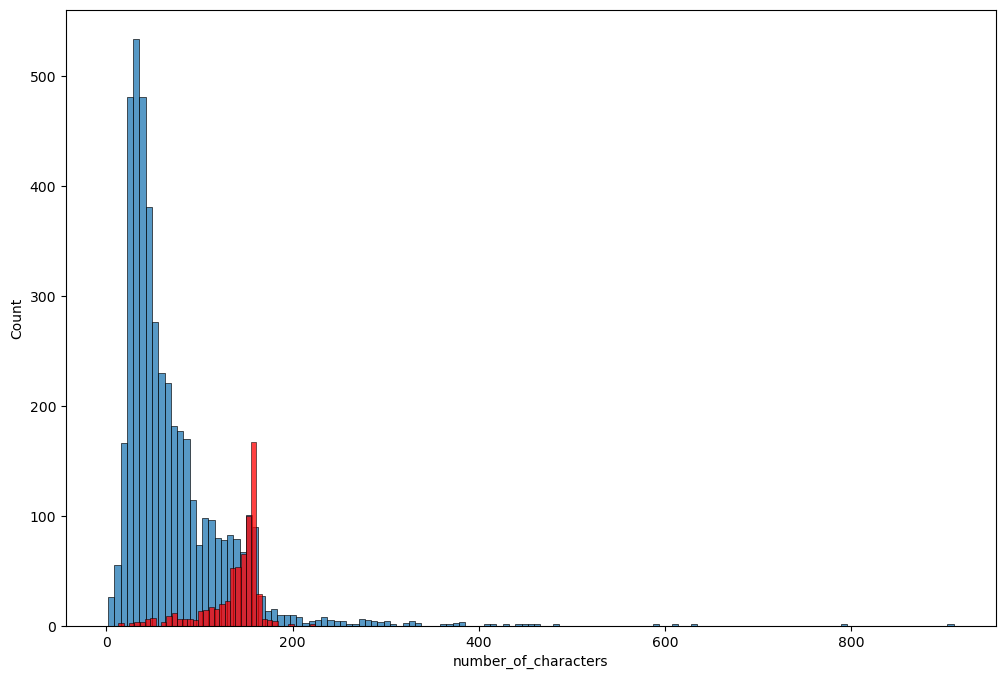

In [56]:
plt.figure(figsize=(12,8))
sns.histplot(spam[spam['target']==0]['number_of_characters'])
sns.histplot(spam[spam['target']==1]['number_of_characters'],color='red')

<Axes: xlabel='number_of_words', ylabel='Count'>

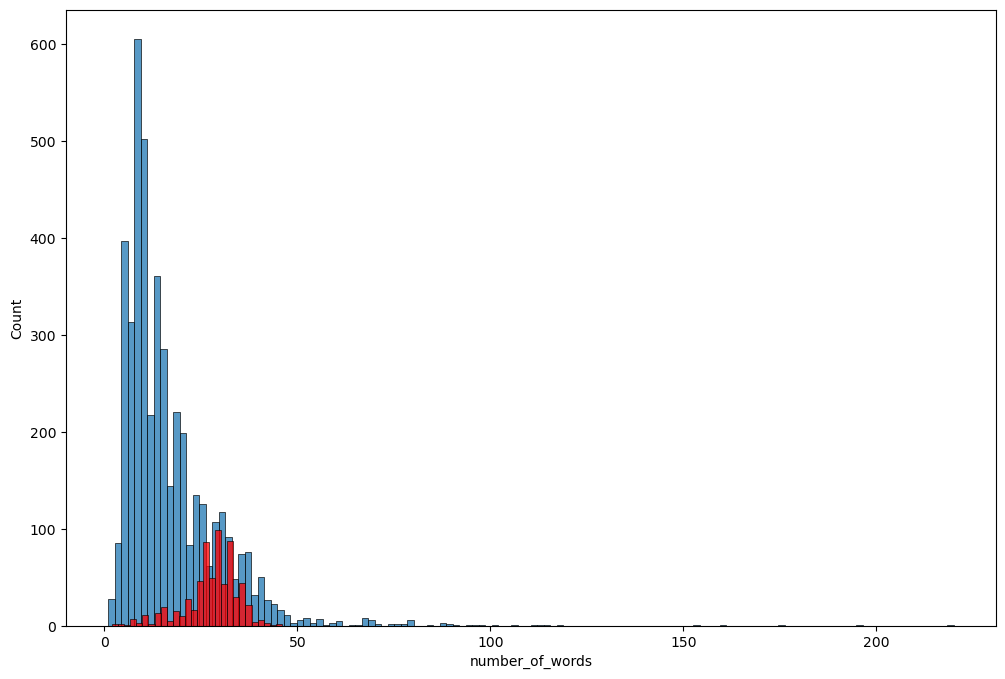

In [57]:
plt.figure(figsize=(12,8))
sns.histplot(spam[spam['target']==0]['number_of_words'])
sns.histplot(spam[spam['target']==1]['number_of_words'],color='red')

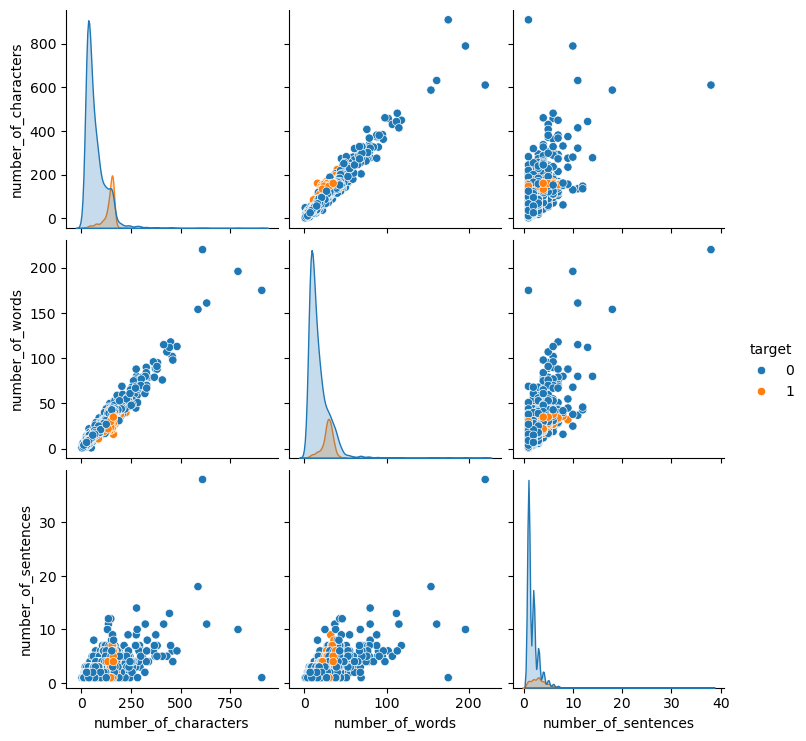

In [59]:
sns.pairplot(spam,hue='target') 

<Axes: >

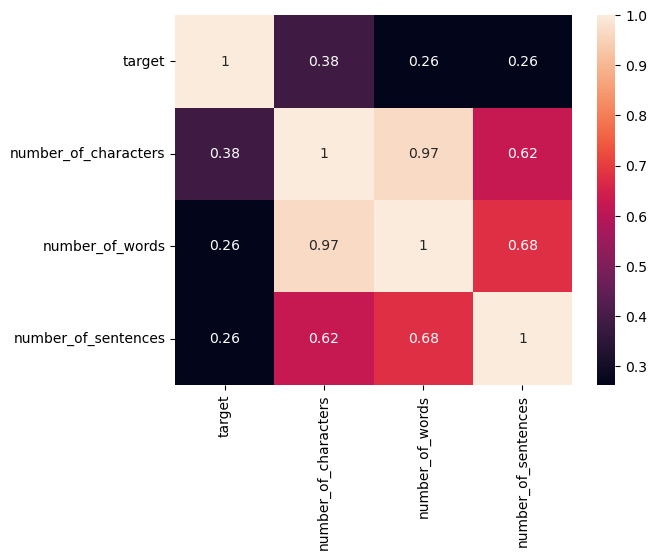

In [60]:
sns.heatmap(spam[['target','number_of_characters','number_of_words','number_of_sentences']].corr(),annot=True)

In [66]:
from nltk.corpus import stopwords
import nltk
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)  
    y = []

    # Keep only alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y
    y = []
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

 

In [72]:
spam['transformed_text']=spam['text'].apply(transform_text)

In [73]:
spam.head()

,target,text,number_of_characters,number_of_words,number_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
spam_corpus=[]
for msg in spam[spam['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [75]:
len(spam_corpus)

9939

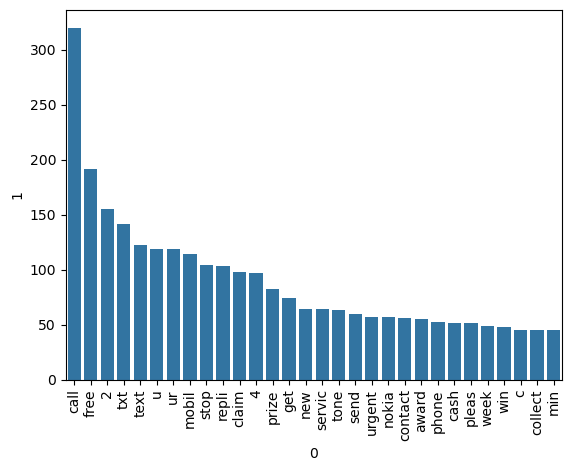

In [76]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [78]:
X=cv.fit_transform(spam['transformed_text']).toarray()

In [79]:
X.shape

(5169, 6708)

In [80]:
y=spam['target'].values

In [81]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.linear_model import LogisticRegression


In [84]:
lr=LogisticRegression()

In [85]:
lr.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred=lr.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("accuracy score is:",accuracy_score(y_test,y_pred))
print("confusion matrix is:",confusion_matrix(y_test,y_pred))
print("precision score is:",precision_score(y_test,y_pred))

accuracy score is: 0.97678916827853
confusion matrix is: [[885   4]
 [ 20 125]]
precision score is: 0.9689922480620154


In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [89]:
Xnew=tfidf.fit_transform(spam['transformed_text']).toarray()

In [90]:
ynew=spam['target'].values

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xnew,ynew,test_size=0.2,random_state=42)

In [92]:
lr1=LogisticRegression()

In [93]:
lr1.fit(X_train,y_train)

LogisticRegression()

In [94]:
y_pred=lr1.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print("accuracy score is:",accuracy_score(y_test,y_pred))
print("confusion matrix is:",confusion_matrix(y_test,y_pred))
print("precision score is:",precision_score(y_test,y_pred))

accuracy score is: 0.9584139264990329
confusion matrix is: [[883   6]
 [ 37 108]]
precision score is: 0.9473684210526315


In [127]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(lr,open('Model.pkl','wb'))

In [ ]:
nltk